<a href="https://colab.research.google.com/github/Rafael07/minor-projects/blob/main/retail_store/retail_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing necessary libs for data manipulation
import pandas as pd
import seaborn as sns

In [2]:
#reading data and testing
sales_df = pd.read_excel('/content/drive/MyDrive/Projetos DNC/Cases aulas/Analise de Dados/varejo.xlsx')
sales_df.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [3]:
#renaming the columns and setting lowercase for better reading
sales_df.rename(columns= {'idcompra':'idsales', 'idcanalvenda':'idsaleschannel', 'bandeira':'flag', 'Data':'Date', 'Preço':'Price', 'Preço_com_frete':'shipping_included_price', 'Nome_Departamento':'Department', 'estado':'state', 'cliente_log':'client_log'}, inplace= True)
sales_df.rename(columns= str.lower, inplace= True)
sales_df.head()

,idsales,idsaleschannel,flag,date,price,shipping_included_price,department,state,cliente_log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [4]:
#cheking info and looking that for price and state columns null values are present
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   idsales                  80228 non-null  int64         
 1   idsaleschannel           80228 non-null  object        
 2   flag                     80228 non-null  object        
 3   date                     80228 non-null  datetime64[ns]
 4   price                    79926 non-null  float64       
 5   shipping_included_price  80228 non-null  float64       
 6   department               80228 non-null  object        
 7   state                    79926 non-null  object        
 8   cliente_log              80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [5]:
#checking the number of sales by channel
sales_df.groupby('idsaleschannel').idsales.nunique()

idsaleschannel
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idsales, dtype: int64

In [6]:
#after noticing that APP tag is the same as Aplicativo, lets merge then into one for better manipulation
sales_df['idsaleschannel'] = sales_df['idsaleschannel'].str.replace('Aplicativo', 'APP')
sales_df.groupby('idsaleschannel').idsales.nunique()

idsaleschannel
APP         21539
Internet    24515
Mobile      24732
Name: idsales, dtype: int64

In [7]:
#checking the number of sales by flag
sales_df.groupby('flag').idsales.nunique()

flag
A    27679
B    38483
Name: idsales, dtype: int64

In [8]:
#checking the number of sales by department
sales_df.groupby('department').idsales.nunique()

department
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares     144

In [9]:
#checking the number of sales by state
sales_df.groupby('state').idsales.nunique()

state
AC       10
AL      461
AM       15
AP        3
BA     2028
CE     1007
DF     1902
ES     1254
GO     1603
MA      129
MG    10538
MT      510
PA      108
PB      536
PE     1632
PI      247
PR     2754
RJ    16213
RN      463
RO       15
RR        7
RS     4099
SC     1932
SE      340
SP    25962
TO      101
Name: idsales, dtype: int64

In [10]:
#replace blanks for underscore for good practice on department columns
sales_df['department'] = sales_df['department'].str.replace(' ','_')
sales_df.groupby('department').idsales.nunique()

department
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares     144

In [11]:
#checking nulls
sales_df[sales_df['state'].isnull()]

,idsales,idsaleschannel,flag,date,price,shipping_included_price,department,state,cliente_log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,APP,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,APP,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [12]:
#working with null according to the state premise
sales_df['state'].fillna('MS', inplace= True)
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   idsales                  80228 non-null  int64         
 1   idsaleschannel           80228 non-null  object        
 2   flag                     80228 non-null  object        
 3   date                     80228 non-null  datetime64[ns]
 4   price                    79926 non-null  float64       
 5   shipping_included_price  80228 non-null  float64       
 6   department               80228 non-null  object        
 7   state                    80228 non-null  object        
 8   cliente_log              80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [13]:
#for price, mean is required to replace null values
price_mean = sales_df['price'].mean()
sales_df['price'].fillna(price_mean, inplace= True)
price_mean


906.5891285439033

In [14]:
#checking null treat
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   idsales                  80228 non-null  int64         
 1   idsaleschannel           80228 non-null  object        
 2   flag                     80228 non-null  object        
 3   date                     80228 non-null  datetime64[ns]
 4   price                    80228 non-null  float64       
 5   shipping_included_price  80228 non-null  float64       
 6   department               80228 non-null  object        
 7   state                    80228 non-null  object        
 8   cliente_log              80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [15]:
#checking the second premise, where price whith shipping must not be cheaper than price
sales_df[['price','shipping_included_price']].describe()

,price,shipping_included_price
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [16]:
#validating the dataframe according to the premise
wrong_price_df = sales_df.query('price > shipping_included_price')

right_price_df = sales_df.query('price < shipping_included_price')


In [17]:
#checking df stats
right_price_df.describe()

,idsales,price,shipping_included_price,cliente_log
count,22047.000000,22047.000000,22047.000000,22047.000000
mean,253799.955550,549.518401,567.332688,13856.313013
std,144794.628563,846.295127,863.458763,8049.120135
min,25.000000,8.720000,9.512000,1.000000
25%,127670.000000,93.528000,100.800000,6858.000000
50%,257885.000000,183.200000,193.912000,13845.000000
75%,379705.000000,661.680000,676.736000,20801.000000
max,499960.000000,14391.200000,14407.120000,27982.000000


In [18]:
#show the first 5 rows of the adjusted dataframe
right_price_df.head()

,idsales,idsaleschannel,flag,date,price,shipping_included_price,department,state,cliente_log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [19]:
#just a filter for information checking
right_price_df.query("department == 'Esporte_e_Lazer' and state == 'SP'").describe()

,idsales,price,shipping_included_price,cliente_log
count,168.000000,168.000000,168.00000,168.000000
mean,265130.744048,1070.083095,1098.71319,14368.571429
std,140435.252208,617.138494,620.66244,7890.233136
min,2145.000000,10.896000,16.11200,210.000000
25%,157955.000000,527.200000,545.32000,7717.500000
50%,253702.500000,1108.008000,1136.24800,15281.000000
75%,380616.250000,1599.200000,1618.88400,20538.000000
max,496910.000000,2399.200000,2432.74400,27837.000000


In [20]:
#first metric: departments with most sales
right_price_df.groupby("department").idsales.nunique().sort_values(ascending=False).reset_index()

,department,idsales
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


In [21]:
#second metric: average price with shipping by department
round(right_price_df.groupby('department')['shipping_included_price'].agg('mean').sort_values(ascending= False).reset_index(), 2)

,department,shipping_included_price
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [22]:
#starting the third metric: number of sales by date
right_price_df.groupby('date').idsales.nunique().sort_values(ascending= False).reset_index()

,date,idsales
0,2023-02-13,226
1,2023-01-20,218
2,2023-03-07,215
3,2023-03-30,214
4,2023-02-20,214
...,...,...
114,2023-02-15,162
115,2023-04-04,162
116,2023-02-25,161
117,2023-02-22,156


In [23]:
#creating month column to show the third metric as requested
right_price_df['month'] = right_price_df['date'].dt.month_name()
right_price_df.head()

<ipython-input-23-ddad150e4937>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_price_df['month'] = right_price_df['date'].dt.month_name()


,idsales,idsaleschannel,flag,date,price,shipping_included_price,department,state,cliente_log,month
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,March
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,March
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,February
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,March
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,February


In [24]:
#resolving the third metric: number of sales by month
right_price_df.groupby('month').idsales.nunique().sort_values(ascending= False).reset_index()

,month,idsales
0,March,5590
1,April,5454
2,January,5309
3,February,5138


In [25]:
#loading the other database
clients_df = pd.read_excel('/content/drive/MyDrive/Projetos DNC/Cases aulas/Analise de Dados/cliente_varejo.xlsx')
clients_df.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [26]:
#adjusting columns names
clients_df.columns = ['client_log', 'age', 'income']
clients_df.head()

,client_log,age,income
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [27]:
#checking right price sales df to seek the match with clients df
right_price_df.head()

,idsales,idsaleschannel,flag,date,price,shipping_included_price,department,state,cliente_log,month
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,March
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,March
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,February
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,March
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,February


In [28]:
#Both columns should have a key columns with same name for the join, but the right sales df must correct the name to do so
right_price_df.rename(columns= {'cliente_log':'client_log'}, inplace= True)
right_price_df.head()

<ipython-input-28-534d5eae2aac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_price_df.rename(columns= {'cliente_log':'client_log'}, inplace= True)


,idsales,idsaleschannel,flag,date,price,shipping_included_price,department,state,client_log,month
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,March
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,March
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,February
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,March
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,February


In [29]:
#stats view
clients_df[['age', 'income']].describe()

,age,income
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [30]:
#df summary with info()
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   client_log  26425 non-null  int64
 1   age         26425 non-null  int64
 2   income      26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [31]:
#changing income type to float
clients_df['income']= clients_df['income'].astype('float')
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   client_log  26425 non-null  int64  
 1   age         26425 non-null  int64  
 2   income      26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [32]:
#creating new df with merged dfs
sales_client_df = right_price_df.merge(clients_df, how= 'left', on= 'client_log')
sales_client_df.head()

,idsales,idsaleschannel,flag,date,price,shipping_included_price,department,state,client_log,month,age,income
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,March,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,March,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,March,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,March,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,February,78,6596.0


In [33]:
#fourth metric: average income by id sales channel
agg_idsaleschannel_income = round(sales_client_df.groupby('idsaleschannel')['income'].agg('mean').sort_values(ascending= False).reset_index(), 2)
agg_idsaleschannel_income

,idsaleschannel,income
0,APP,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [34]:
#fifth metric: average client age by flag
agg_flag_age = round(sales_client_df.groupby('flag')['age'].agg('mean').sort_values(ascending= False).reset_index())
agg_flag_age

,flag,age
0,A,53.0
1,B,53.0


## Data visualization section

In [35]:
#import libs
import matplotlib.pyplot as plt

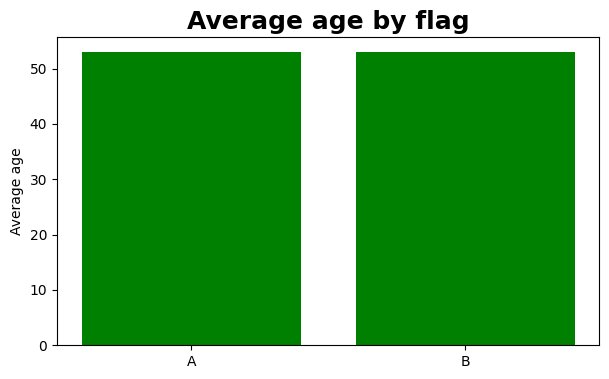

In [36]:
#creating graph structurefor Average age by flag
fig = plt.figure(figsize=(7, 4))

plt.bar(agg_flag_age['flag'], agg_flag_age['age'], color= 'green')
plt.ylabel('Average age')

plt.title('Average age by flag', loc='center', fontsize= 18, fontweight= 'bold', color= 'black');


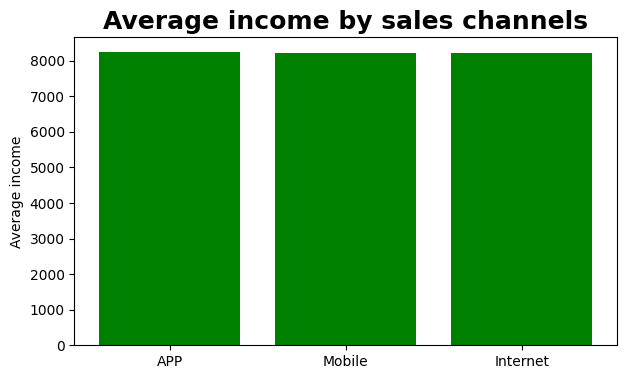

In [37]:
#creating graph for Average income by sales channels
fig = plt.figure(figsize=(7, 4))

plt.bar(agg_idsaleschannel_income['idsaleschannel'], agg_idsaleschannel_income['income'], color= 'green')
plt.ylabel('Average income')

plt.title('Average income by sales channels', loc='center', fontsize= 18, fontweight= 'bold', color= 'black');


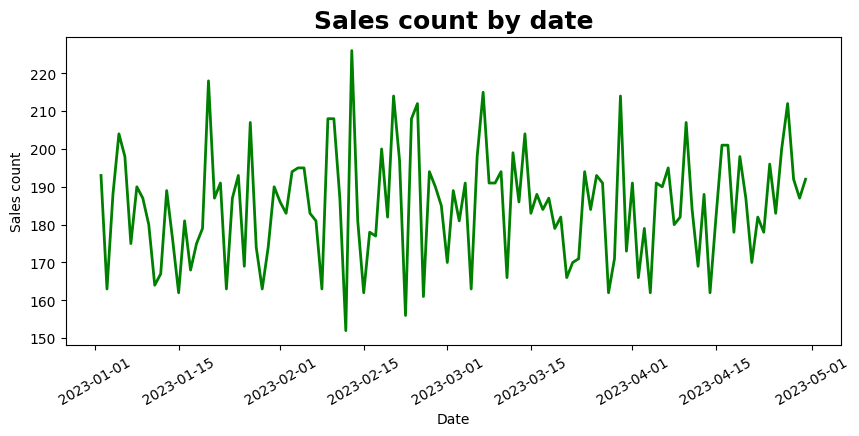

In [38]:
#sales count by date graph
sales_by_date = right_price_df.groupby('date').idsales.nunique().reset_index()
fig = plt.figure(figsize= (10,4))
plt.xlabel('Date')
plt.ylabel('Sales count')
plt.title("Sales count by date", loc='center', fontsize= 18, fontweight= 'bold', color= 'black')
plt.xticks(rotation= 30)
plt.plot(sales_by_date['date'], sales_by_date['idsales'], color= 'green', linewidth= '2')
plt.show()

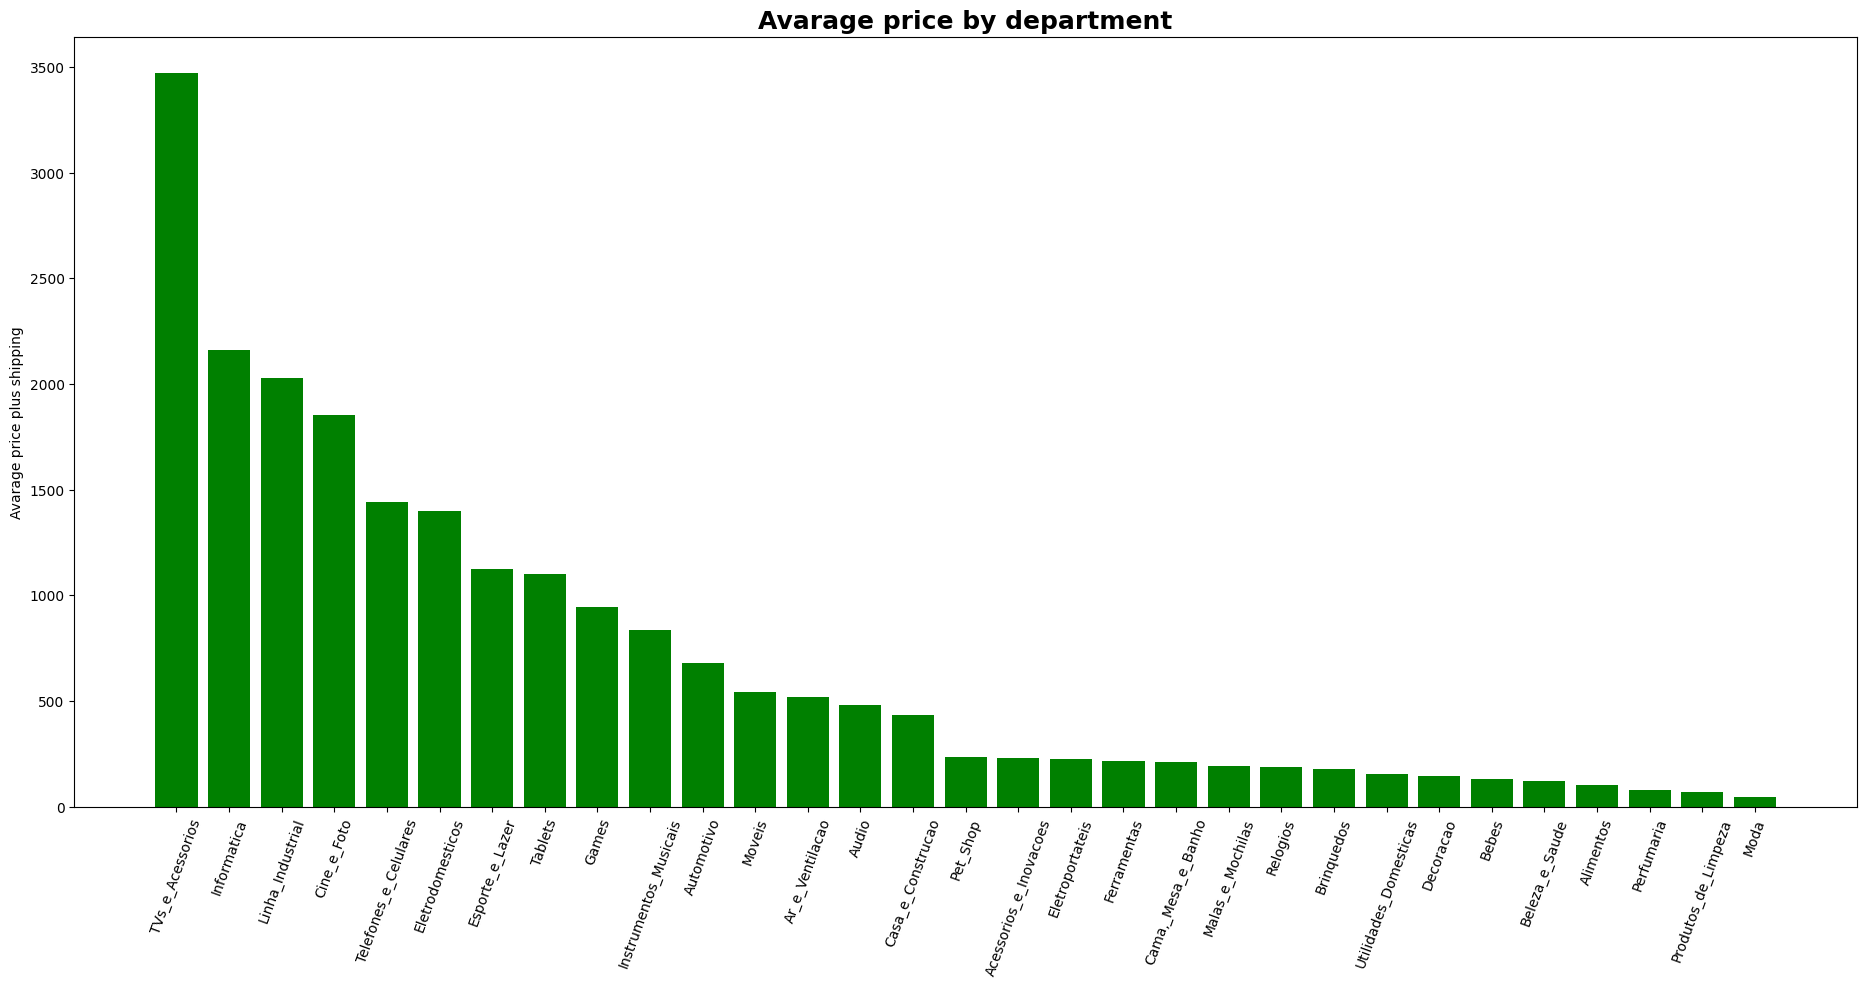

In [39]:
agg_department_price = round(right_price_df.groupby('department')['shipping_included_price'].agg('mean').sort_values(ascending= False).reset_index(), 2)

fig = plt.figure(figsize=(23,10))
plt.xticks(rotation= 70)
plt.bar(agg_department_price['department'], agg_department_price['shipping_included_price'], color= 'green')
plt.ylabel('Avarage price plus shipping')
plt.title("Avarage price by department", loc='center', fontsize= 18, fontweight= 'bold', color= 'black');

In [ ]:
#installing the libs
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [41]:
#importing installed libs
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [42]:
#using plotly to generate previous graphs
px.bar(agg_flag_age, x='flag', y='age')

In [43]:
#using plotly to generate previous graphs
px.line(sales_by_date, x='date', y='idsales')

In [44]:
#using plotly to generate previous graphs
px.bar(agg_department_price, x='department', y='shipping_included_price')

#**Conclusion**

By analysing data, a dashboard with all metrics were created to show the results for the executives